<a href="https://colab.research.google.com/github/zohaibhaider2002/ML-projects/blob/main/House__Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HOUSE PRICE PREDICTION USING LINEAR REGRESSION**

**Import the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from pandas.api.types import CategoricalDtype



**Load the Data**

In [ ]:
train_data_path=r"/content/train.csv"
test_data_path=r"/content/test.csv"

data_train=pd.read_csv(train_data_path)
data_test=pd.read_csv(test_data_path)

print(data_train.shape)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
data_train.head(2)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [ ]:
print(data_test.shape)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
data_test.head(2)

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


## **Knowing our Data**

We will use the following data/ features in our data:
LotArea
Neighborhood
OverallQual
OverallCond
YearBuilt
Foundation
Electrical
KitchenQual
GarageType
GarageFinish
Fence






# **Data Integration**

In [ ]:
df= pd.concat([data_train,data_test])
print("Shape of Integrated Data", df.shape)

Shape of Integrated Data (2919, 81)


In [ ]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [ ]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


**Get the Breif Infformation of data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

Most Null Values:
Alley
FireplaceQc
PoolQc
Fence
MiscFeature



In [ ]:
int_features=df.select_dtypes(include=["int64"]).columns
print("Shape of Integer Features:",int_features.shape[0])

print("Total number of integer features",int_features.tolist())

Shape of Integer Features: 26
Total number of integer features ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [ ]:
float_features=df.select_dtypes(include=["float64"]).columns
print("Shape of loating Features:",float_features.shape[0])

print("Total number of integer features",float_features.tolist())

Shape of loating Features: 12
Total number of integer features ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [ ]:
cat_features=df.select_dtypes(include=["object"]).columns
print("Shape of categorical Features:",cat_features.shape[0])

print("Total number of categorical features",cat_features.tolist())

Shape of categorical Features: 43
Total number of categorical features ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


# **Get the statistical Infromation of Data**

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [ ]:
df["LotFrontage"]

,LotFrontage
0,65.0
1,80.0
2,68.0
3,60.0
4,84.0
5,85.0
6,75.0
7,NaN
8,51.0
9,50.0


# **Handling Missing Values**

## Visualize Null/missing value

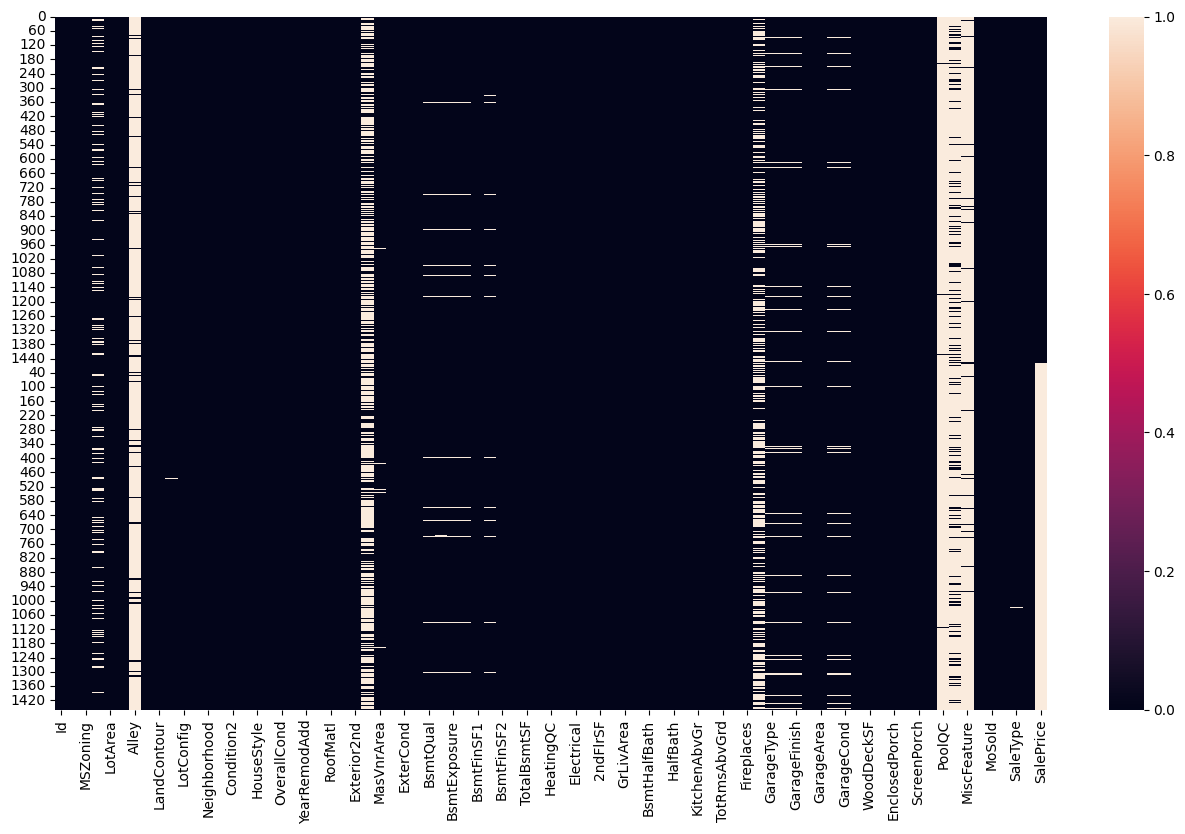

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("D:\7th Semester\Intro to Robotics\ASSIGNMEN.png")




## Get the Null value Percentage for every feature

In [ ]:
# Set Id as index
df= df.set_index("Id")

In [ ]:
null_count=df.isnull().sum()
null_count

,0
MSSubClass,0
MSZoning,4
LotFrontage,486
LotArea,0
Street,0
Alley,2721
LotShape,0
LandContour,0
Utilities,2
LotConfig,0


In [ ]:
null_percent=df.isnull().sum()/df.shape[0]* 100
null_percent

,0
MSSubClass,0.000000
MSZoning,0.137033
LotFrontage,16.649538
LotArea,0.000000
Street,0.000000
Alley,93.216855
LotShape,0.000000
LandContour,0.000000
Utilities,0.068517
LotConfig,0.000000


## **Drop Columns /Features**
As per observation we will not drop any feature

In [ ]:
"We will not drop the columns/features, instead we replace it with a constant Value: NA"
missing_value_50_percent=null_percent[null_percent>50]
missing_value_50_percent

,0
Alley,93.216855
MasVnrType,60.500171
PoolQC,99.657417
Fence,80.438506
MiscFeature,96.402878


In [ ]:
df["Alley"].value_counts()

,count
Alley,
Grvl,120
Pave,78


In [ ]:
df["MiscFeature"].value_counts()

,count
MiscFeature,
Shed,95
Gar2,5
Othr,4
TenC,1


In [ ]:
"We will not drop the columns/features, instead we replace it with a constant Value: NA"
missing_value_20_50_percent=null_percent[(null_percent>20) & (null_percent<51)]
missing_value_20_50_percent

,0
FireplaceQu,48.646797
SalePrice,49.982871


In [ ]:
"We will not drop the columns/features, instead we replace it with a constant Value: NA"
missing_value_5_20_percent=null_percent[(null_percent>5) & (null_percent<20)]
missing_value_5_20_percent

,0
LotFrontage,16.649538
GarageType,5.378554
GarageYrBlt,5.447071
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071


In [ ]:
df["LotFrontage"].value_counts()

,count
LotFrontage,
60.0,276
80.0,137
70.0,133
50.0,117
75.0,105
65.0,93
85.0,76
21.0,50
24.0,49


<Axes: ylabel='Id'>

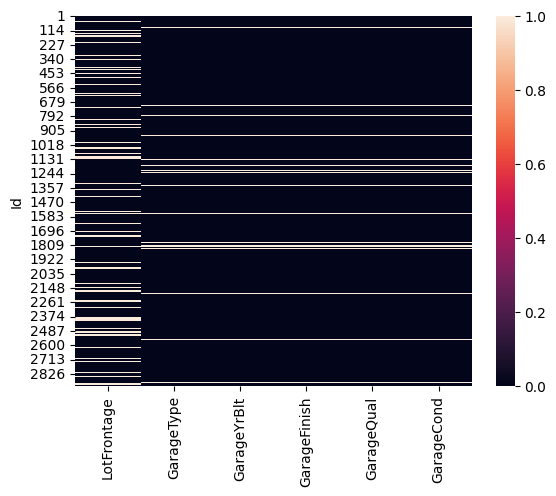

In [ ]:
"Plotting the data to see the missing values"
sns.heatmap(df[missing_value_5_20_percent.keys()].isnull())

# **Missing Value Imputation**

In [ ]:
missing_value_feat= null_percent[null_percent>0]
print("Missing Value Features:",len(missing_value_feat))

Missing Value Features: 35


In [ ]:
missing_value_feat


,0
MSZoning,0.137033
LotFrontage,16.649538
Alley,93.216855
Utilities,0.068517
Exterior1st,0.034258
Exterior2nd,0.034258
MasVnrType,60.500171
MasVnrArea,0.787941
BsmtQual,2.774923
BsmtCond,2.809181


In [ ]:
int_na_feat=missing_value_feat[missing_value_feat.keys().isin(int_features)]
print("Missing Value Features:",len(int_na_feat))
int_na_feat

Missing Value Features: 0


,0


In [ ]:
float_na_feat=missing_value_feat[missing_value_feat.keys().isin(float_features)]
print("Missing Value Features:",len(float_na_feat))
float_na_feat

Missing Value Features: 12


,0
LotFrontage,16.649538
MasVnrArea,0.787941
BsmtFinSF1,0.034258
BsmtFinSF2,0.034258
BsmtUnfSF,0.034258
TotalBsmtSF,0.034258
BsmtFullBath,0.068517
BsmtHalfBath,0.068517
GarageYrBlt,5.447071
GarageCars,0.034258


##  Handling MS Zoning = 0.137033

In [ ]:
df["MSZoning"].value_counts()

,count
MSZoning,
RL,2265
RM,460
FV,139
RH,26
C (all),25


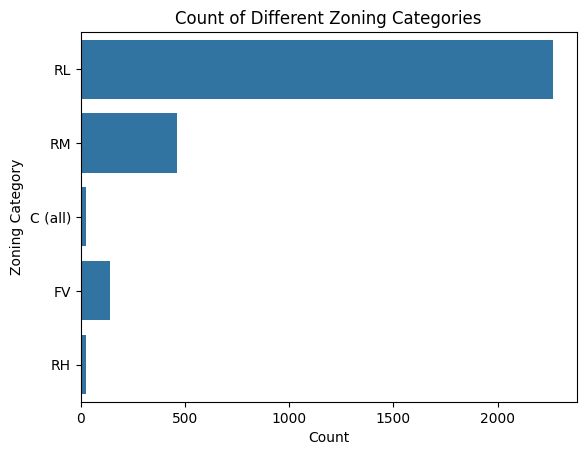

In [ ]:
sns.countplot(df["MSZoning"])
plt.title("Count of Different Zoning Categories")
plt.xlabel("Count")
plt.ylabel("Zoning Category")
plt.show()


In [ ]:
"making original data copy"
df_mvi = df.copy()
df_mvi.shape

(2919, 80)

In [ ]:
ms_zoning_mode=df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan,ms_zoning_mode,inplace=True)
df_mvi["MSZoning"].isnull().sum()

<ipython-input-35-2662fe4f503e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MSZoning"].replace(np.nan,ms_zoning_mode,inplace=True)


0

In [ ]:
ms_zoning_mode=df["MSZoning"].mode()[0]
ms_zoning_mode

'RL'

<Axes: xlabel='count', ylabel='MSZoning'>

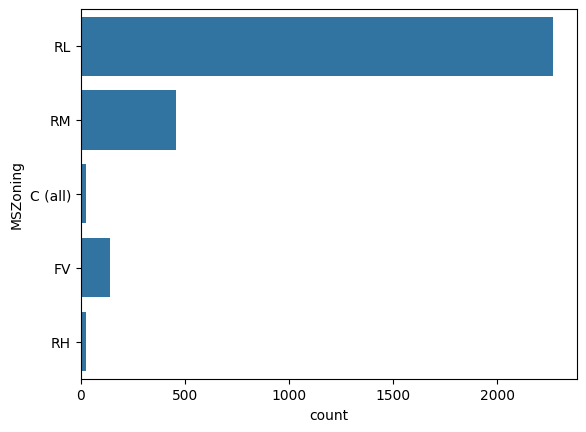

In [ ]:
sns.countplot(df_mvi["MSZoning"])

In [ ]:
def oldNewCountPlot(df,df_new,feature):
  plt.subplot(121)
  sns.countplot(df["MSZoning"])
  plt.title("Old Data Distribution")

  plt.subplot(122)
  sns.countplot(df_new["MSZoning"])
  plt.title("New Data Distribution")


In [ ]:
cat_na_feat=missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print("Missing Value Features:",len(cat_na_feat))
cat_na_feat

Missing Value Features: 23


,0
MSZoning,0.137033
Alley,93.216855
Utilities,0.068517
Exterior1st,0.034258
Exterior2nd,0.034258
MasVnrType,60.500171
BsmtQual,2.774923
BsmtCond,2.809181
BsmtExposure,2.809181
BsmtFinType1,2.706406


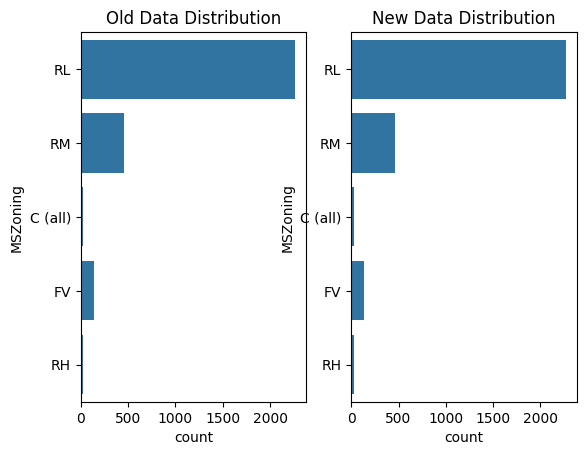

In [ ]:
oldNewCountPlot(df,df_mvi,"MSZoning")

## Handling Alley=93.21685

In [ ]:
df_mvi["Alley"].value_counts()

,count
Alley,
Grvl,120
Pave,78


In [ ]:
alley_cont= "NA"
df_mvi["Alley"].replace(np.nan,alley_cont,inplace=True)
df_mvi["Alley"].isnull().sum()

<ipython-input-42-a3253a167434>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Alley"].replace(np.nan,alley_cont,inplace=True)


0

In [ ]:
def oldNewCountPlot(df,df_new,feature):
  plt.subplot(121)
  sns.countplot(df["Alley"])
  plt.title("Old Data Distribution")

  plt.subplot(122)
  sns.countplot(df_new["Alley"])
  plt.title("New Data Distribution")


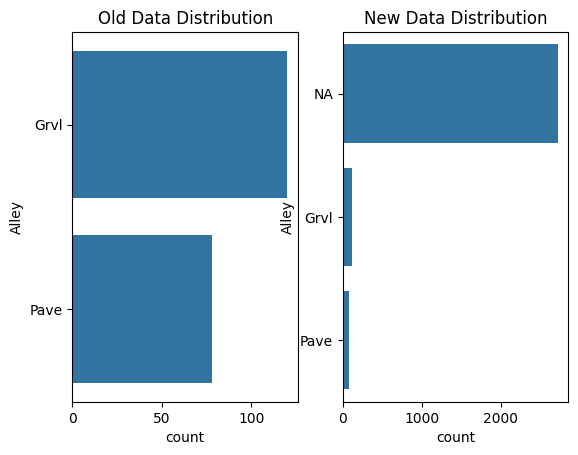

In [ ]:
oldNewCountPlot(df,df_mvi,"Alley")

## Handling LotFrontage=16.649538

In [ ]:
df_mvi["LotFrontage"].value_counts()

,count
LotFrontage,
60.0,276
80.0,137
70.0,133
50.0,117
75.0,105
65.0,93
85.0,76
21.0,50
24.0,49


In [ ]:
def BoxHistPlot(df,figsize=(16,5)):
  plt.figure(figsize=figsize)
  plt.subplot(121)
  sns.boxplot(df)
  plt.subplot(122)
  sns.distplot(df)

<ipython-input-46-6a0807be64a8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


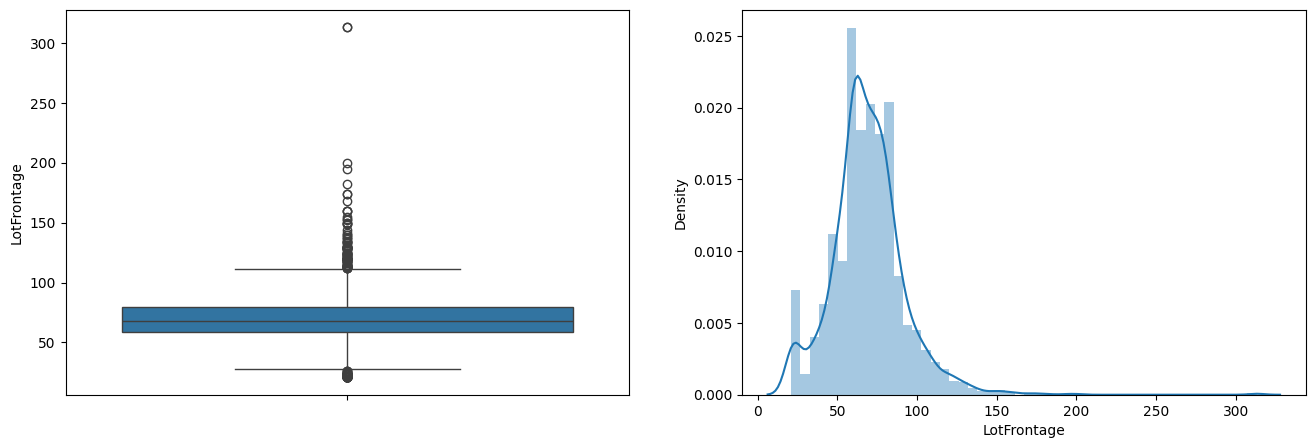

In [ ]:
BoxHistPlot(df["LotFrontage"])

In [ ]:
lot_frontage= df["LotFrontage"].mean()
df_mvi["LotFrontage"].replace(np.nan,lot_frontage,inplace= True)
df_mvi["LotFrontage"].isnull().sum()

<ipython-input-48-c356b76b7df0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["LotFrontage"].replace(np.nan,lot_frontage,inplace= True)


0

In [ ]:
def oldNewBoxHistPlot(df,df_new,feature,figsize=(16,10)):
  plt.figure(figsize=figsize)
  plt.subplot(221)
  sns.boxplot(df[feature])
  plt.title("Old Data Distribution")

  plt.subplot(222)
  sns.histplot(df[feature])
  plt.title("Old Data Distribution")

  plt.subplot(223)
  sns.boxplot(df_new[feature])
  plt.title("New Data Distribution")

  plt.subplot(224)
  sns.histplot(df_new[feature])
  plt.title("New Data Distribution")


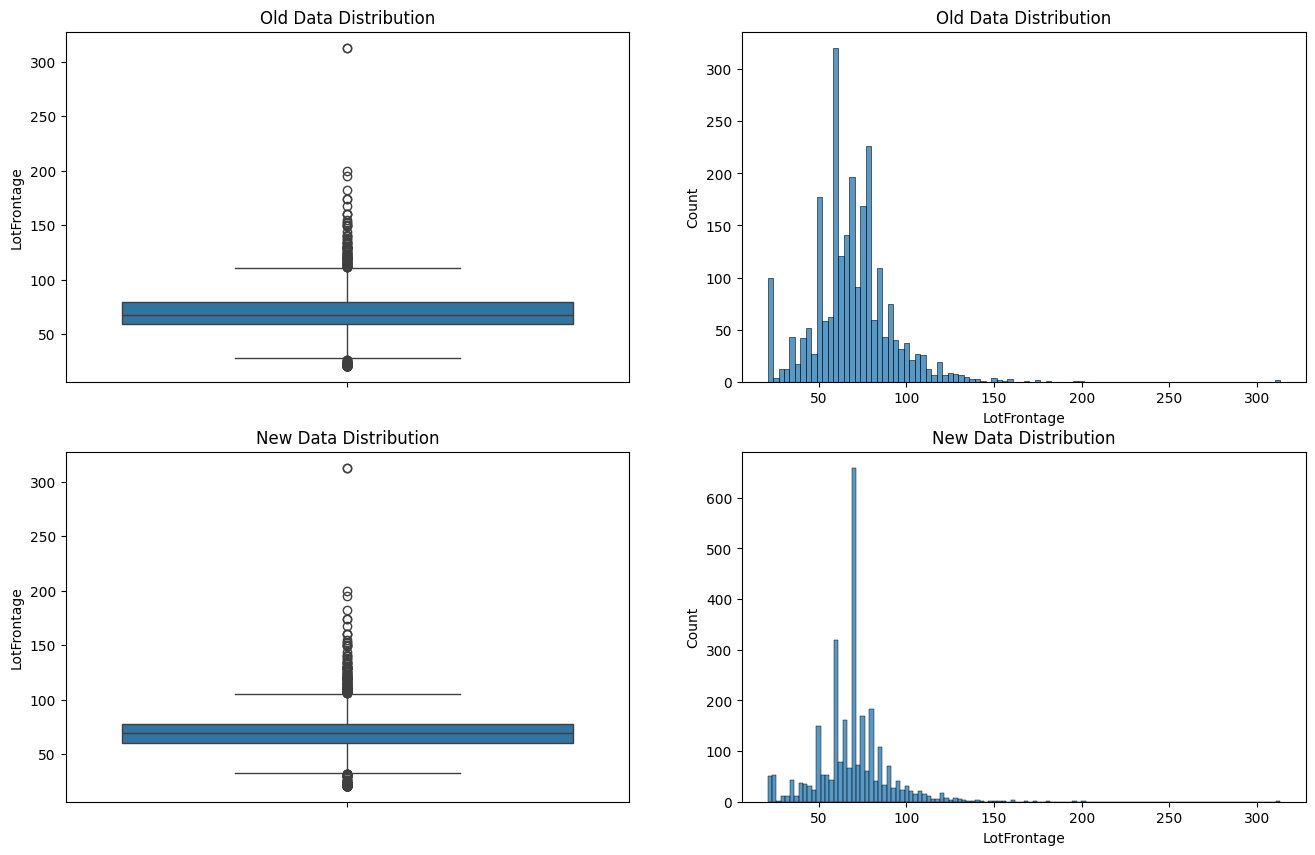

In [ ]:
oldNewBoxHistPlot(df,df_mvi,"LotFrontage")

## Handling Utilities=0.068517

In [ ]:
df["Utilities"].value_counts()

,count
Utilities,
AllPub,2916
NoSeWa,1


In [ ]:
utilities_mode=df["Utilities"].mode()[0]
utilities_mode

df_mvi["Utilities"].replace(np.nan, utilities_mode, inplace=True)
df_mvi["Utilities"].isnull().sum()

<ipython-input-52-ff23fc914cd5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Utilities"].replace(np.nan, utilities_mode, inplace=True)


0

## Handling Exterior1st=0.034258 & Exterior2nd=0.034258

In [ ]:
df["Exterior1st"].value_counts()

,count
Exterior1st,
VinylSd,1025
MetalSd,450
HdBoard,442
Wd Sdng,411
Plywood,221
CemntBd,126
BrkFace,87
WdShing,56
AsbShng,44


In [ ]:
df["Exterior2nd"].value_counts()

,count
Exterior2nd,
VinylSd,1014
MetalSd,447
HdBoard,406
Wd Sdng,391
Plywood,270
CmentBd,126
Wd Shng,81
BrkFace,47
Stucco,47


In [ ]:
exterior1st_mode=df["Exterior1st"].mode()[0]
print("E1 mode value is :",exterior1st_mode)

df_mvi["Exterior1st"].replace(np.nan, utilities_mode, inplace=True)
print("E1 is Null", df_mvi["Exterior1st"].isnull().sum())



exterior2nd_mode=df["Exterior2nd"].mode()[0]
print("E2 mode value is :",exterior2nd_mode)

df_mvi["Exterior2nd"].replace(np.nan, utilities_mode, inplace=True)
print("E2 is Null",df_mvi["Exterior2nd"].isnull().sum())


E1 mode value is : VinylSd
E1 is Null 0
E2 mode value is : VinylSd
E2 is Null 0


<ipython-input-55-3844446ba7b3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior1st"].replace(np.nan, utilities_mode, inplace=True)
<ipython-input-55-3844446ba7b3>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

## Handling MasVnrType=60.500171 & MasVnrArea=0.787941

<Axes: ylabel='Id'>

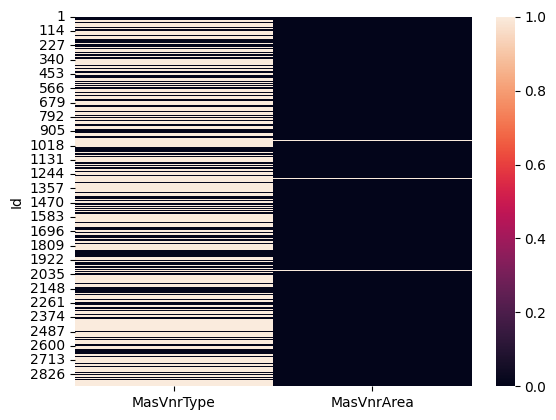

In [ ]:
 sns.heatmap(df[["MasVnrType","MasVnrArea"]].isnull())

In [ ]:
df["MasVnrType"].value_counts()

,count
MasVnrType,
BrkFace,879
Stone,249
BrkCmn,25


In [ ]:
masvnrtype_mode=df["MasVnrType"].mode()[0]
masvnrtype_mode

df_mvi["MasVnrType"].replace(np.nan, masvnrtype_mode, inplace=True)##
df_mvi["MasVnrType"].isnull().sum()

<ipython-input-58-f2e9ac01cac5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrType"].replace(np.nan, masvnrtype_mode, inplace=True)##


0

In [ ]:
df_mvi[df_mvi[["MasVnrType","MasVnrArea"]].isnull().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
235,60,RL,69.305795,7851,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625.0,Unf,0.0,235.0,860.0,GasA,Ex,Y,SBrkr,860,1100,0,1960,1.0,0.0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2.0,440.0,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500.0
530,20,RL,69.305795,32668,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,BrkFace,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219.0,Unf,0.0,816.0,2035.0,GasA,TA,Y,SBrkr,2515,0,0,2515,1.0,0.0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2.0,484.0,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624.0
651,60,FV,65.000000,8125,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,BrkFace,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,813.0,813.0,GasA,Ex,Y,SBrkr,822,843,0,1665,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2.0,562.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950.0
937,20,RL,67.000000,10083,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900.0
974,20,FV,95.000000,11639,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,BrkFace,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1428.0,1428.0,GasA,Ex,Y,SBrkr,1428,0,0,1428,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2.0,480.0,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000.0
978,120,FV,35.000000,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900.0
1244,20,RL,107.000000,13891,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000.0
1279,60,RL,75.000000,9473,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000.0
1692,60,RL,69.305795,12891,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,B

<ipython-input-46-6a0807be64a8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


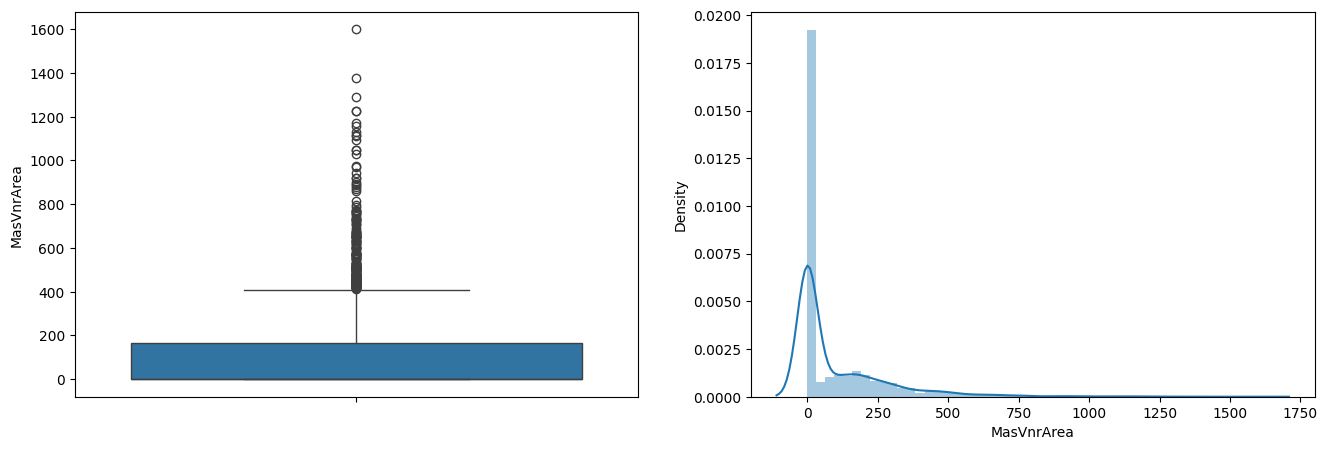

In [ ]:
BoxHistPlot(df["MasVnrArea"])

In [ ]:
masvnrarea_cont=0
masvnrarea_cont

df_mvi["MasVnrArea"].replace(np.nan, masvnrarea_cont, inplace=True)##
df_mvi["MasVnrArea"].isnull().sum()

<ipython-input-61-58653aa524a8>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrArea"].replace(np.nan, masvnrarea_cont, inplace=True)##


0

## Handling Basement Features

## Categorical features


In [ ]:
## Categorical features
## BsmtQual	2.774923
## BsmtCond	2.809181
## BsmtExposure	2.809181
## BsmtFinType1	2.706406
## BsmtFinType2	2.740665


## Numerical features

In [ ]:
## Numerical Features
## BsmtFinSF1	0.034258
## BsmtFinSF2	0.034258
## BsmtUnfSF	0.034258
## TotalBsmtSF	0.034258
## BsmtFullBath	0.068517
## BsmtHalfBath	0.068517


In [ ]:
cat_bsmt_feat=["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"	]

num_bsmt_feat=["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF" ,"BsmtFullBath","BsmtHalfBath"]

<Axes: ylabel='Id'>

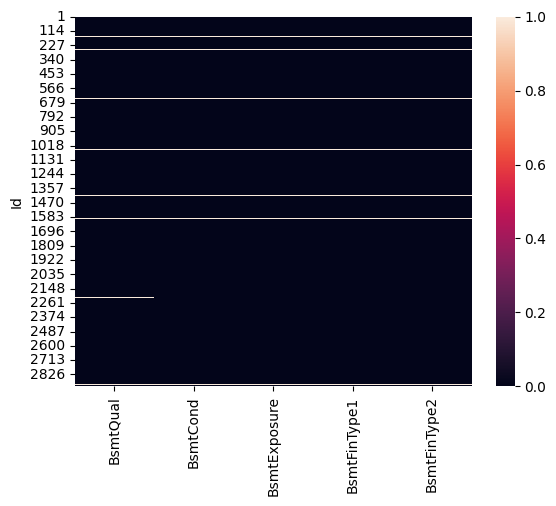

In [ ]:
sns.heatmap(df_mvi[cat_bsmt_feat].isnull())

In [ ]:
for feat in cat_bsmt_feat:
  print(f"Value Counts of {feat}:{df[feat].value_counts()}")

Value Counts of BsmtQual:BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
Value Counts of BsmtCond:BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
Value Counts of BsmtExposure:BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
Value Counts of BsmtFinType1:BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
Value Counts of BsmtFinType2:BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [ ]:
bsmt_cont="NA"
for feat in cat_bsmt_feat:
  df_mvi[feat].replace(np.nan,bsmt_cont,inplace=True)

<ipython-input-67-2842e02130f7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,bsmt_cont,inplace=True)


In [ ]:
df_mvi[cat_bsmt_feat].isnull().sum()

,0
BsmtQual,0
BsmtCond,0
BsmtExposure,0
BsmtFinType1,0
BsmtFinType2,0


<Axes: ylabel='Id'>

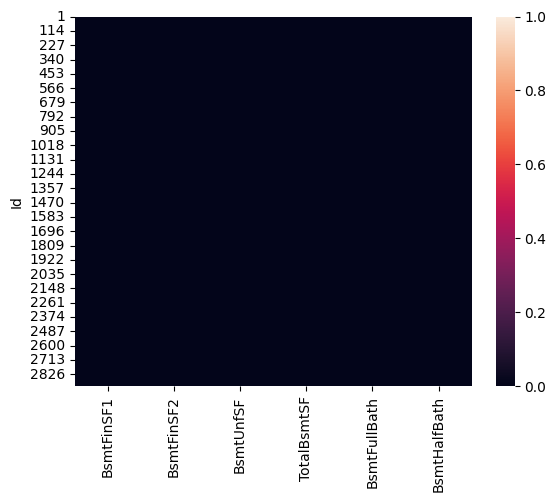

In [ ]:
sns.heatmap(df_mvi[num_bsmt_feat].isnull())

In [ ]:
df_bsmt=df[cat_bsmt_feat+num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis=1)]


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
260,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
333,Gd,TA,No,GLQ,NaN,1124.0,479.0,1603.0,3206.0,1.0,0.0
343,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
bsmt_num=0
for feat in num_bsmt_feat:
  df_mvi[feat].replace(np.nan,bsmt_num,inplace=True)

<ipython-input-71-d1abbc91b0ab>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,bsmt_num,inplace=True)


In [ ]:
  df_mvi[num_bsmt_feat].isnull().sum()

,0
BsmtFinSF1,0
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0
BsmtFullBath,0
BsmtHalfBath,0


## Handling Electrical	0.034258 &

```
# This is formatted as code
```

KitchenQual	0.034258

In [ ]:
df["Electrical"].value_counts()

,count
Electrical,
SBrkr,2671
FuseA,188
FuseF,50
FuseP,8
Mix,1


In [ ]:
df["KitchenQual"].value_counts()

,count
KitchenQual,
TA,1492
Gd,1151
Ex,205
Fa,70


In [ ]:
df_ekk=df[["Electrical","KitchenQual","KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1556,SBrkr,NaN,1


In [ ]:
electrical_mode=df["Electrical"].mode()[0]
masvnrtype_mode

df_mvi["Electrical"].replace(np.nan, electrical_mode, inplace=True)
df_mvi["Electrical"].isnull().sum()

<ipython-input-76-cca974db7549>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Electrical"].replace(np.nan, electrical_mode, inplace=True)


0

In [ ]:
kitchenqual_mode=df["KitchenQual"].mode()[0]
masvnrtype_mode

df_mvi["KitchenQual"].replace(np.nan,kitchenqual_mode, inplace=True)
df_mvi["KitchenQual"].isnull().sum()

<ipython-input-77-21726ebde04e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["KitchenQual"].replace(np.nan,kitchenqual_mode, inplace=True)


0

## Handling Other features

In [ ]:
##Functional	0.068517  Mode
##FireplaceQu	48.646797  NA
##PoolQC	99.657417  NA
##Fence	80.438506  NA
##MiscFeature	96.402878  NA
##SaleType	0.034258  Mode


In [ ]:
df["Functional"].value_counts()

,count
Functional,
Typ,2717
Min2,70
Min1,65
Mod,35
Maj1,19
Maj2,9
Sev,2


In [ ]:
functional_mode=df["Functional"].mode()[0]
functional_mode

df_mvi["Functional"].replace(np.nan, functional_mode, inplace=True)
df_mvi["Functional"].isnull().sum()

<ipython-input-80-9d7c2c7f4125>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Functional"].replace(np.nan, functional_mode, inplace=True)


0

In [ ]:
df["SaleType"].value_counts()

,count
SaleType,
WD,2525
New,239
COD,87
ConLD,26
CWD,12
ConLI,9
ConLw,8
Oth,7
Con,5


In [ ]:
saletype_mode=df["SaleType"].mode()[0]
saletype_mode

df_mvi["SaleType"].replace(np.nan, saletype_mode, inplace=True)
df_mvi["SaleType"].isnull().sum()

<ipython-input-82-afe28e6f40b2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["SaleType"].replace(np.nan, saletype_mode, inplace=True)


0

In [ ]:
other_cat_feat=["FireplaceQu","PoolQC","Fence","MiscFeature"]

for feat in other_cat_feat:
  print(f"Value Counts of {feat}:{df[feat].value_counts()}")

Value Counts of FireplaceQu:FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
Value Counts of PoolQC:PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
Value Counts of Fence:Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
Value Counts of MiscFeature:MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


In [ ]:
fireplacequ_cont="NA"
fireplacequ_cont

df_mvi["FireplaceQu"].replace(np.nan, fireplacequ_cont, inplace=True)
df_mvi["FireplaceQu"].isnull().sum()

<ipython-input-84-cbd6424d1698>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["FireplaceQu"].replace(np.nan, fireplacequ_cont, inplace=True)


0

In [ ]:
fence_cont="NA"
fence_cont

df_mvi["Fence"].replace(np.nan, fence_cont, inplace=True)
df_mvi["Fence"].isnull().sum()

<ipython-input-85-67b7a718cc60>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Fence"].replace(np.nan, fence_cont, inplace=True)


0

In [ ]:
poolqc_cont="NA"
poolqc_cont

df_mvi["PoolQC"].replace(np.nan, poolqc_cont, inplace=True)
df_mvi["PoolQC"].isnull().sum()

<ipython-input-86-d7d2bffadc3f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["PoolQC"].replace(np.nan, poolqc_cont, inplace=True)


0

In [ ]:
miscfeature_cont="NA"
miscfeature_cont

df_mvi["MiscFeature"].replace(np.nan,miscfeature_cont, inplace=True)
df_mvi["MiscFeature"].isnull().sum()

<ipython-input-87-06c97d71d930>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MiscFeature"].replace(np.nan,miscfeature_cont, inplace=True)


0

## Handling Garage Features

In [ ]:
##GarageType	5.378554  NA
##GarageFinish	5.447071 NA
##GarageQual	5.447071 NA
##GarageCond	5.447071 NA

##GarageYrBlt	5.447071 0
##GarageCars	0.034258 0
##GarageArea	0.034258 0

In [ ]:
cat_garage_feat=["GarageType","GarageFinish","GarageQual","GarageCond"]

num_garage_feat=["GarageYrBlt","GarageCars","GarageArea"]
df_garage=df[cat_garage_feat+num_garage_feat]
df_garage[df_garage.isnull().any(axis=1)]

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageCars,GarageArea
Id,,,,,,,
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0
49,NaN,NaN,NaN,NaN,NaN,0.0,0.0
79,NaN,NaN,NaN,NaN,NaN,0.0,0.0
89,NaN,NaN,NaN,NaN,NaN,0.0,0.0
90,NaN,NaN,NaN,NaN,NaN,0.0,0.0
100,NaN,NaN,NaN,NaN,NaN,0.0,0.0
109,NaN,NaN,NaN,NaN,NaN,0.0,0.0
126,NaN,NaN,NaN,NaN,NaN,0.0,0.0
128,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [ ]:
garage_cont="NA"
for feat in cat_garage_feat:
  df_mvi[feat].replace(np.nan, garage_cont, inplace=True)
df_mvi[cat_garage_feat].isnull().sum()

<ipython-input-90-eac4ba5c9aa9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, garage_cont, inplace=True)


,0
GarageType,0
GarageFinish,0
GarageQual,0
GarageCond,0


In [ ]:
garage_cont=0
for feat in num_garage_feat:
  df_mvi[feat].replace(np.nan, garage_cont, inplace=True)
df_mvi[num_garage_feat].isnull().sum()

<ipython-input-91-711cdde9966b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, garage_cont, inplace=True)


,0
GarageYrBlt,0
GarageCars,0
GarageArea,0


In [ ]:
df_mvi.isnull().any(axis=1).sum()

1459

## Data Transformation


In [ ]:
for_num_conv=["MSSubClass","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]

for feat in for_num_conv:
  print(f"{feat}:data type= {df_mvi[feat].dtype}")


MSSubClass:data type= int64
YearBuilt:data type= int64
YearRemodAdd:data type= int64
GarageYrBlt:data type= float64
MoSold:data type= int64
YrSold:data type= int64


In [ ]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [ ]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [ ]:
calendar.month_abbr[1]

'Jan'

In [ ]:
df_mvi["MoSold"]= df_mvi["MoSold"].apply(lambda x : calendar.month_abbr[x])

In [ ]:
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [ ]:
for feat in for_num_conv:
  df_mvi[feat]=df_mvi[feat].astype(str)

In [ ]:
for feat in for_num_conv:
  print(f"{feat}:data type{df_mvi[feat].dtype}")

MSSubClass:data typeobject
YearBuilt:data typeobject
YearRemodAdd:data typeobject
GarageYrBlt:data typeobject
MoSold:data typeobject
YrSold:data typeobject


## Converting Categorical Feature to Numerical Features

### Ordinal Encoding

In [ ]:
##ExterQual
##ExterCond
##BsmtQual
##BsmtCond
##BsmtExposure
##BsmtFinType1
##BsmtFinSF1
##BsmtFinType2
##HeatingQC
##KitchenQual
##FireplaceQu
##GarageQual
##GarageCond
##PoolQC
##Functional
##GarageFinish
##PavedDrive
##Utilities



In [ ]:
ordinal_enc_var= [
"ExterQual",
"ExterCond"
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinSF1",
"BsmtFinType2",
"HeatingQC",
"KitchenQual",
"FireplaceQu"
"GarageQual",
"GarageCond",
"PoolQC",
"Functional",
"GarageFinish",
"PavedDrive",
"Utilities"
]

print("Total number of features to convert ordinal features: ",len(ordinal_enc_var))

Total number of features to convert ordinal features:  16


In [ ]:
df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

,0
Id,
1,3
2,2
3,3
4,2
5,3
6,2
7,3
8,2
9,2


In [ ]:
df_mvi["ExterQual"].value_counts()

,count
ExterQual,
TA,1798
Gd,979
Ex,107
Fa,35


In [ ]:
print(df_mvi["ExterQual"].unique())


['Gd' 'TA' 'Ex' 'Fa']


In [ ]:
df_mvi["ExterCond"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

,0
Id,
1,2
2,2
3,2
4,2
5,2
6,2
7,2
8,2
9,2


In [ ]:
df_mvi["ExterCond"].value_counts()

,count
ExterCond,
TA,2538
Gd,299
Fa,67
Ex,12
Po,3
